In [5]:
# Task 6: K-Nearest Neighbors (KNN) Classification using Iris.csv

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

In [6]:
# Step 2: Load Dataset
df = pd.read_csv("Iris.csv")


In [7]:

# Step 3: Prepare Features (X) and Labels (y)
# Drop ID column if exists
X = df.drop(columns=["Id", "Species"])
y = df["Species"]



# Convert all feature columns to numeric (handle errors if any bad values exist)
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values if any were created
X = X.dropna()
y = y[X.index]  # keep labels aligned

In [8]:

# Step 4: Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


In [10]:
# Step 6: Train KNN (K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy: 1.0


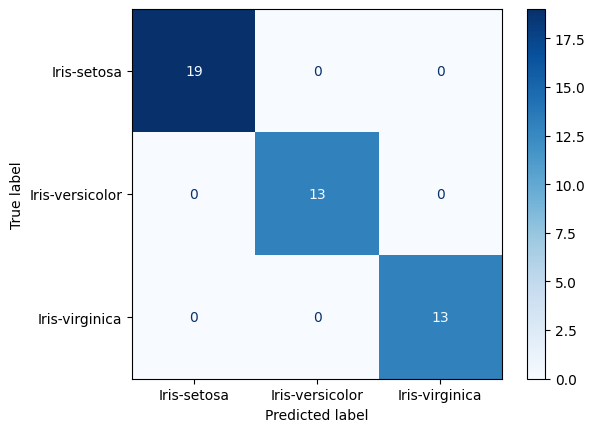

In [12]:
# Step 7: Predictions & Evaluation
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()



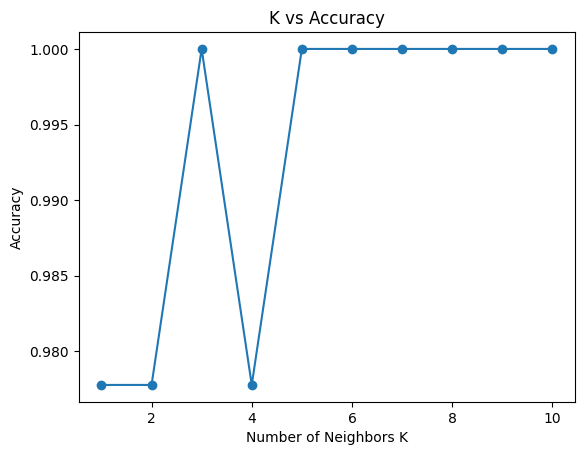

In [13]:
# Step 8: Experiment with different K values
accuracies = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 11), accuracies, marker='o')
plt.xlabel("Number of Neighbors K")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()

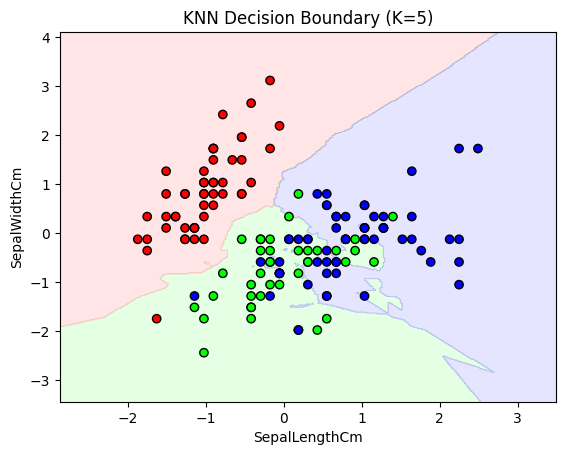

In [16]:
from sklearn.preprocessing import LabelEncoder

# Step 9: Decision Boundary (using only first 2 features for visualization)
X_plot = X_scaled[:, :2]  # SepalLength & SepalWidth
y_encoded = LabelEncoder().fit_transform(y)  # convert Species to numeric codes

X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(
    X_plot, y_encoded, test_size=0.3, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_plot, y_train_plot)

# Meshgrid for plotting
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, Z, alpha=0.3,
             cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))

plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_encoded,
            edgecolor='k',
            cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))

plt.title("KNN Decision Boundary (K=5)")
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.show()
